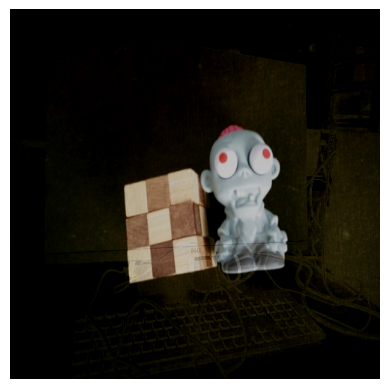

In [1]:
!pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images
image1 = cv2.imread('Googly.jpg')
image2 = cv2.imread('Comp.jpg')

# Check if images are loaded successfully
if image1 is None:
    print("Error: Image 1 not loaded. Check the file path.")
if image2 is None:
    print("Error: Image 2 not loaded. Check the file path.")

# Only proceed if both images are loaded correctly
if image1 is not None and image2 is not None:
    # Resize images to the same size (optional)
    image1 = cv2.resize(image1, (500, 500))  # Resize both images to the same size
    image2 = cv2.resize(image2, (500, 500))

    # Set the alpha and beta values for blending
    alpha = 0.8  # Controls the weight of the first image
    beta = 0.6- alpha  # Controls the weight of the second image

    # Blend the two images together

    blended_image = cv2.addWeighted(image1, alpha, image2, beta, 0)

    # Save the blended image
    cv2.imwrite('blended_image.jpg', blended_image)

    # Display the blended image in Jupyter
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.show()

In [1]:
import cv2

# Step 1: Load the two video files
video1_path = 'Golf.mp4'  # Replace with your video file path
video2_path = 'sea.mp4'  # Replace with your video file path

cap1 = cv2.VideoCapture(video1_path)
cap2 = cv2.VideoCapture(video2_path)

# Step 2: Check if both videos are opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error: Could not open one of the videos.")
    cap1.release()
    cap2.release()
    exit()

# Step 3: Get properties from both videos
width1 = int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
height1 = int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps1 = int(cap1.get(cv2.CAP_PROP_FPS))

width2 = int(cap2.get(cv2.CAP_PROP_FRAME_WIDTH))
height2 = int(cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps2 = int(cap2.get(cv2.CAP_PROP_FPS))

# Step 4: Ensure both videos have the same frame size and frame rate
# Resize video2 to match video1 if necessary
if (width1, height1) != (width2, height2):
    width = min(width1, width2)  # Optional: Use minimum width and height for resizing
    height = min(height1, height2)
else:
    width, height = width1, height1

fps = min(fps1, fps2)  # Optional: Use minimum FPS for the output

# Step 5: Define the codec and create VideoWriter object to save the merged video
output_video_path = 'merged_video.mp4'  # Output video file
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for the output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (2 * width, height))  # Double width for side-by-side

# Step 6: Process frame by frame and merge
while True:
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()

    # Break the loop if either video has ended
    if not ret1 or not ret2:
        break

    # Resize both frames to the same size if necessary
    frame1_resized = cv2.resize(frame1, (width, height))
    frame2_resized = cv2.resize(frame2, (width, height))

    # Step 7: Concatenate frames side by side
    merged_frame = cv2.hconcat([frame1_resized, frame2_resized])

    # Write the merged frame into the output video
    out.write(merged_frame)

    # Step 8: Display the merged frame in a separate window
    cv2.imshow('Merged Video', merged_frame)

    # Press 'q' to exit the video window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 9: Release everything when the job is done
cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

print("Video merging completed successfully!")


Video merging completed successfully!


In [2]:
import cv2

# Step 1: Load the two video files
video1_path = 'Sea.mp4'  # Replace with your main (background) video file path
video2_path = 'Golf.mp4'  # Replace with your overlay (PiP) video file path

cap1 = cv2.VideoCapture(video1_path)
cap2 = cv2.VideoCapture(video2_path)

# Step 2: Check if both videos are opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error: Could not open one of the videos.")
    cap1.release()
    cap2.release()
    exit()

# Step 3: Get properties of the main video
width1 = int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
height1 = int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps1 = int(cap1.get(cv2.CAP_PROP_FPS))

# Step 4: Get properties of the PiP video
width2 = int(cap2.get(cv2.CAP_PROP_FRAME_WIDTH))
height2 = int(cap2.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps2 = int(cap2.get(cv2.CAP_PROP_FPS))

# Step 5: Ensure both videos have the same frame rate, or select the lower one
fps = min(fps1, fps2)

# Step 6: Resize the second (PiP) video to fit in the corner (for example, 1/4th of the main video size)
pip_width = width1 // 4
pip_height = height1 // 4

# Step 7: Define the codec and create VideoWriter object to save the merged video
output_video_path = 'pip_merged_video.mp4'  # Output video file
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for the output video
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width1, height1))

# Step 8: Process frame by frame and merge
while True:
    ret1, frame1 = cap1.read()  # Read frame from the main video
    ret2, frame2 = cap2.read()  # Read frame from the PiP video

    # Break the loop if either video has ended
    if not ret1 or not ret2:
        break

    # Resize the PiP frame to fit into the corner
    frame2_resized = cv2.resize(frame2, (pip_width, pip_height))

    # Step 9: Place the PiP video in the bottom-right corner of the main video
    # Determine the region where the PiP will be placed (bottom-right corner)
    x_offset = width1 - pip_width  # X position for the top-left corner of PiP
    y_offset = height1 - pip_height  # Y position for the top-left corner of PiP

    # Place the resized PiP frame onto the main frame
    frame1[y_offset:height1, x_offset:width1] = frame2_resized

    # Write the merged frame into the output video
    out.write(frame1)

    # Display the merged frame in a separate window (optional)
    cv2.imshow('PiP Merged Video', frame1)

    # Press 'q' to exit the video window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 10: Release everything when the job is done
cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

print("PiP Video merging completed successfully!")


PiP Video merging completed successfully!


In [21]:
import cv2
import numpy as np

# Step 1: Load the two video files
video1_path = 'Golf.mp4'  # Main video
video2_path = 'Sea.mp4'  # Video with pixels to overlay

cap1 = cv2.VideoCapture(video1_path)
cap2 = cv2.VideoCapture(video2_path)

# Step 2: Check if both videos are opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error: Could not open one of the videos.")
    cap1.release()
    cap2.release()
    exit()

# Step 3: Get properties of the main video
width1 = int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
height1 = int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps1 = int(cap1.get(cv2.CAP_PROP_FPS))

# Step 4: Define the codec and create VideoWriter object to save the merged video
output_video_path = 'overlayed_video.mp4'  # Output video file
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for the output video
out = cv2.VideoWriter(output_video_path, fourcc, fps1, (width1, height1))

# Step 5: Process frame by frame
while True:
    ret1, frame1 = cap1.read()  # Read frame from the main video
    ret2, frame2 = cap2.read()  # Read frame from the second video

    # Break the loop if either video has ended
    if not ret1 or not ret2:
        break

    # Step 6: Define the region of interest (ROI) from frame2 to overlay
    # For example, let's say we want a square area in the center of frame2
    roi_x_start = width1 // 10  # Start x position
    roi_y_start = height1 // 10 # Start y position
    roi_width = width1 // 6     # Width of the area to overlay
    roi_height = height1 //  6    # Height of the area to overlay

    # Ensure we do not go out of bounds
    roi_x_start = min(roi_x_start, frame2.shape[1] - roi_width)
    roi_y_start = min(roi_y_start, frame2.shape[0] - roi_height)

    # Extract the region from frame2
    roi = frame2[roi_y_start:roi_y_start + roi_height, roi_x_start:roi_x_start + roi_width]

    # Step 7: Overlay the ROI onto frame1
    # Define the position where to place the ROI in frame1
    overlay_x_start = roi_x_start  # Position in frame1
    overlay_y_start = roi_y_start   # Position in frame1

    # Make sure the overlay doesn't go out of bounds in frame1
    overlay_x_start = min(overlay_x_start, frame1.shape[1] - roi_width)
    overlay_y_start = min(overlay_y_start, frame1.shape[0] - roi_height)

    # Overlay the ROI onto the main frame (you can use blending if needed)
    frame1[overlay_y_start:overlay_y_start + roi_height, overlay_x_start:overlay_x_start + roi_width] = roi

    # Step 8: Write the modified frame to the output video
    out.write(frame1)

    # Display the modified frame (optional)
    cv2.imshow('Overlayed Video', frame1)

    # Press 'q' to exit the video window
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Step 9: Release everything when the job is done
cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

print("Overlayed video completed successfully!")


Overlayed video completed successfully!
